## Cosine Similarity Distances
Cosine similarity measures the similarity between two vectors of an inner product space. In text analysis, a document can be represented by its elements (words) and the frequency of each element. Comparing the frequency of words in different documents, which is the company description for companies in our case, would generate cosine similarity distance between documents. Each description generates a vector containing the frequency of each word. It measures the similarity between these companies in terms of their business description.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/preprocessed.csv', 
                usecols = ['reportingDate', 'name', 
                           'coDescription_stopwords', 'SIC', 'SIC_desc'])

,reportingDate,name,SIC,SIC_desc,coDescription_stopwords
0,2018-02-01,"MONGODB, INC.",7372,Prepackaged Software (mass reproduction of sof...,mongodb leading modern general purpose databas...
1,2018-02-01,SALESFORCE COM INC,7372,Prepackaged Software (mass reproduction of sof...,salesforce global leader customer relationship...
2,2018-02-01,SPLUNK INC,7372,Prepackaged Software (mass reproduction of sof...,splunk provides innovative software solution e...
3,2018-02-01,"OKTA, INC.",7372,Prepackaged Software (mass reproduction of sof...,okta leading independent provider identity ent...
4,2018-02-01,VEEVA SYSTEMS INC,7372,Prepackaged Software (mass reproduction of sof...,veeva leading provider industry cloud solution...
...,...,...,...,...,...
670,2019-01-01,"AMERICAN REALTY CAPITAL NEW YORK CITY REIT, INC.",6798,Real Estate Investment Trusts,ationwe incorporated december maryland corpora...
671,2019-01-01,"CYCLACEL PHARMACEUTICALS, INC.",2834,Pharmaceutical Preparations,llowing business section contains statement ac...
672,2019-01-01,ZOETIS INC.,2834,Pharmaceutical Preparations,expense cost sale consist primarily cost mater...
673,2019-01-01,"STAG INDUSTRIAL, INC.",6798,Real Estate Investment Trusts,certain definitionsin report define gaap gener...


### Words Counting

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

Vectorizer = CountVectorizer(ngram_range = (2,4), 
                             max_features = 600)

count_data = Vectorizer.fit_transform(df['coDescription_stopwords'])

In [5]:
wordsCount = pd.DataFrame(count_data.toarray(),columns=Vectorizer.get_feature_names())

/Users/lulu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [6]:
wordsCount = wordsCount.set_index(df['name'])

In [7]:
wordsCount

,ability make,accounting standard,acquire property,act act,act amended,additional information,adequately capitalized,adverse effect,adverse effect business,adverse event,...,wa million,weighted average,well capitalized,wholly owned,wholly owned subsidiary,wide range,within day,working interest,year ended,year ended december
name,,,,,,,,,,,,,,,,,,,,,
"MONGODB, INC.",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,0,0,5,0
SALESFORCE COM INC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SPLUNK INC,0,0,0,0,1,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"OKTA, INC.",0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
VEEVA SYSTEMS INC,0,12,0,1,4,1,0,7,4,0,...,18,4,0,0,0,0,1,0,102,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"AMERICAN REALTY CAPITAL NEW YORK CITY REIT, INC.",0,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,2,2
"CYCLACEL PHARMACEUTICALS, INC.",0,0,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
ZOETIS INC.,0,17,0,0,0,12,0,3,0,0,...,20,5,0,1,1,0,2,0,84,83


## Compute Cosine Similarity

In [8]:
# Compute Cosine Similarity
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = pd.DataFrame(cosine_similarity(wordsCount, wordsCount))

In [9]:
cosine_sim = cosine_sim.set_index(df['name'])
cosine_sim.columns = df['name']

In [10]:
cosine_sim

name,"MONGODB, INC.",SALESFORCE COM INC,SPLUNK INC,"OKTA, INC.",VEEVA SYSTEMS INC,AUTODESK INC,"INTERNATIONAL WESTERN PETROLEUM, INC.","DAYBREAK OIL & GAS, INC.","ETERNAL SPEECH, INC.","ETERNAL SPEECH, INC.",...,OMEGA HEALTHCARE INVESTORS INC,TABLEAU SOFTWARE INC,HORIZON PHARMA PLC,MERRIMACK PHARMACEUTICALS INC,"REVEN HOUSING REIT, INC.","AMERICAN REALTY CAPITAL NEW YORK CITY REIT, INC.","CYCLACEL PHARMACEUTICALS, INC.",ZOETIS INC.,"STAG INDUSTRIAL, INC.",EQUINIX INC
name,,,,,,,,,,,,,,,,,,,,,
"MONGODB, INC.",1.000000,0.445455,0.610272,0.620961,0.500762,0.338268,0.065380,0.052345,0.000000,0.000000,...,0.050935,0.630465,0.436327,0.143385,0.066598,0.135839,0.144678,0.189609,0.178397,0.102958
SALESFORCE COM INC,0.445455,1.000000,0.635969,0.455189,0.196053,0.418546,0.043515,0.064999,0.000000,0.000000,...,0.029326,0.492079,0.300027,0.133831,0.201221,0.201230,0.145089,0.075038,0.277952,0.354856
SPLUNK INC,0.610272,0.635969,1.000000,0.665648,0.274023,0.373142,0.019112,0.073553,0.000000,0.000000,...,0.018032,0.569939,0.330028,0.116923,0.109538,0.142041,0.128467,0.136418,0.194072,0.273502
"OKTA, INC.",0.620961,0.455189,0.665648,1.000000,0.195672,0.399874,0.013240,0.093942,0.000000,0.000000,...,0.013905,0.579884,0.541775,0.163709,0.109948,0.144051,0.170361,0.111937,0.163588,0.074624
VEEVA SYSTEMS INC,0.500762,0.196053,0.274023,0.195672,1.000000,0.079927,0.074096,0.030179,0.075713,0.075713,...,0.424046,0.280852,0.153335,0.083683,0.128762,0.211695,0.060273,0.501041,0.332207,0.064207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"AMERICAN REALTY CAPITAL NEW YORK CITY REIT, INC.",0.135839,0.201230,0.142041,0.144051,0.211695,0.106627,0.027594,0.048087,0.000000,0.000000,...,0.284525,0.114080,0.075274,0.048741,0.578793,1.000000,0.039971,0.136184,0.471651,0.042298
"CYCLACEL PHARMACEUTICALS, INC.",0.144678,0.145089,0.128467,0.170361,0.060273,0.094262,0.010770,0.025407,0.000000,0.000000,...,0.015318,0.193458,0.462759,0.683597,0.047288,0.039971,1.000000,0.035694,0.080139,0.013121
ZOETIS INC.,0.189609,0.075038,0.136418,0.111937,0.501041,0.069267,0.039015,0.022235,0.065917,0.065917,...,0.159082,0.327556,0.148224,0.051060,0.163391,0.136184,0.035694,1.000000,0.207232,0.031911


## Accuracy - Confusion Matrix / ROC Curves
### Predictions Based on the Closest Cosine Similarity Distance

In [77]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
def get_accuracy(cosine_matrix):
    """calculates percentage of correct category predictions based on 1-NN using dot product
    
    args: embedding matrix of size nxm (n companies each with an embedding of size m). NOTE: embeddings should be normalized.
    
    returns: float representation of percentage of correct category predictions
    """
    np.fill_diagonal(cosine_matrix.values, 0)
    cosine_matrix.index = df["SIC_desc"]
    cosine_matrix.columns = df["SIC_desc"]
    prediction = pd.DataFrame(cosine_matrix.idxmax(axis=1))
    prediction.reset_index(level=0, inplace=True)
    prediction.columns = ["y_true","y_pred"]
    return (prediction, np.sum(np.where(prediction.iloc[:,1] == prediction.iloc[:,0], 1, 0))/
                            len(prediction), confusion_matrix(prediction["y_true"], prediction["y_pred"], 
                                                                    labels=None, sample_weight=None, normalize='true'))

def conf_mat(matrix):
    prediction, accuracy, cm = get_accuracy(matrix)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=df["SIC_desc"].unique())
    disp.plot(xticks_rotation='vertical')
    disp.figure_.savefig('conf_mat.png', dpi=200, bbox_inches='tight')

    return prediction

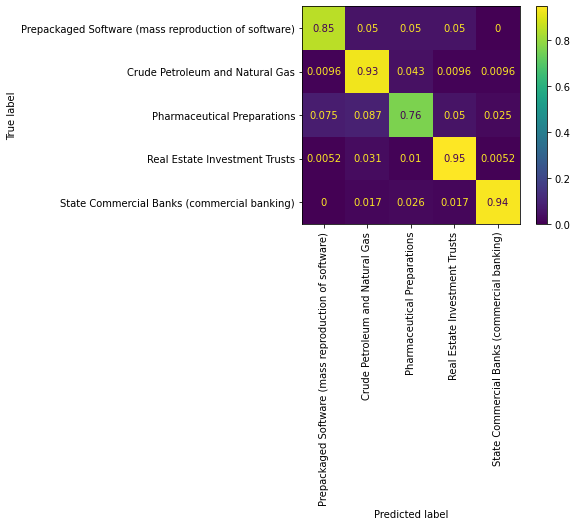

In [78]:
cosine_conf = conf_mat(cosine_sim)

In [54]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
def show_ROC_curves(df, similarity_matrix):
    for i in df["SIC_desc"].unique():
        y_true = similarity_matrix["y_true"] == i
        y_pred = similarity_matrix["y_pred"] == i
        fpr,tpr, _ = roc_curve(y_true, y_pred)
        roc_auc = auc(fpr, tpr)

        plt.plot(
            fpr,
            tpr,
            label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc),
        )
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Some extension of Receiver operating characteristic to multiclass")
    plt.legend(loc="lower right")
    plt.savefig("ROC.png")
    plt.show()

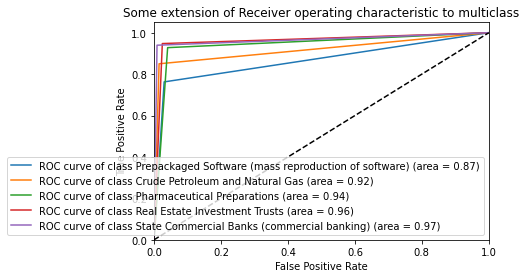

In [55]:
show_ROC_curves(df, cosine_conf)

## Plotting

### Plotting on the Cosine Similarity Matrix

In [21]:
#pip install -U kaleido

In [79]:
import os

if not os.path.exists("images"):
    os.mkdir("images")

In [80]:
from sklearn.decomposition import PCA
import plotly.express as px

# Referenced from Richard's CSCD25 course
def visualize(vectors, index, category):
    pca = PCA(n_components=10)
    pca_embedding = pca.fit_transform(vectors)
    pca_embedding = pd.DataFrame(pca_embedding, index = index)
    
    pca_embedding['SIC'] = list(category)
    pca_embedding['SIC'] = pca_embedding['SIC'].astype('category')
    
    fig = px.scatter(pca_embedding, x =0 , y = 1, 
                     hover_data={"Name": pca_embedding.index}, 
                     color = 'SIC', width=1200, height=750)
    fig.show()
    
    return [pca, pca_embedding]

In [81]:
plot_cos = visualize(cosine_sim, cosine_sim.index, df['SIC_desc'])

In [82]:
fig = px.scatter_3d(plot_cos[1], x =0 , y = 1, z = 2, hover_data={"name": plot_cos[1].index}, color = 'SIC', width=1200, height=700)
fig.write_image("images/fig_cos.png")
fig.show()

We can look at the explained variance of each dimension the PCA embedding of our cosine similatiry matrix produced below:

In [26]:
plot_cos[0].explained_variance_ratio_

array([0.43705121, 0.21549028, 0.13752174, 0.05257744, 0.03654605,
       0.01467293, 0.00914707, 0.00835553, 0.0072873 , 0.00633825])

The total explained variance of the first three dimensions are:

In [ ]:
plot_cos[0].explained_variance_ratio_[0:3].sum()